## RQVAE Code Distribution Experiment

**To reproduce, at the root directory, run the following command line arguments:**

`python3 -m ID_generation.generate_id --dataset Beauty --batch_size 10240 --epochs 20000 --lr 0.001 --beta 0.25 --input_dim 64 --hidden_dim '[512,256,128]' --latent_dim 32 --num_layers 3 --code_book_size '[4,16,256]' --dropout 0.1 --save_location Beauty_semantic_ids_tiger_exp.pkl`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import defaultdict 
import json
from sklearn.decomposition import PCA
import seaborn as sns


## Codebook Usage

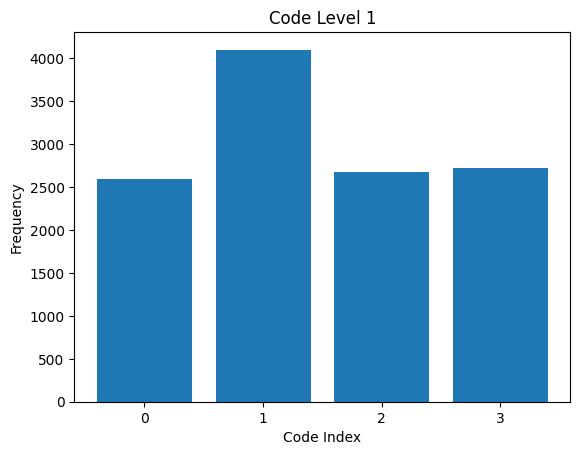

In [4]:
semantic_ids = pickle.load(open('ID_generation/ID/Beauty_semantic_ids_tiger_exp.pkl', 'rb'))
codebook_size = len(np.unique(semantic_ids[:,0]))

counts, _, _ = plt.hist(semantic_ids[:,0], bins=np.arange(codebook_size+1) - 0.5, rwidth=0.8)
labels = np.arange(codebook_size)

plt.xticks(ticks=np.arange(codebook_size), labels=labels)
plt.xlabel('Code Index')
plt.title('Code Level 1')
plt.ylabel('Frequency')

plt.show()


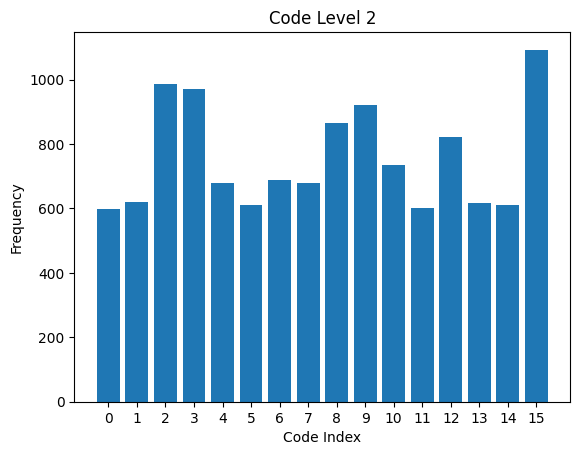

In [5]:
codebook_size = len(np.unique(semantic_ids[:,1]))

counts, _, _ = plt.hist(semantic_ids[:,1], bins=np.arange(codebook_size+1) - 0.5, rwidth=0.8)

labels = np.arange(codebook_size)
plt.xticks(ticks=np.arange(codebook_size), labels=labels)

plt.xlabel('Code Index')
plt.title('Code Level 2')
plt.ylabel('Frequency')

plt.show()


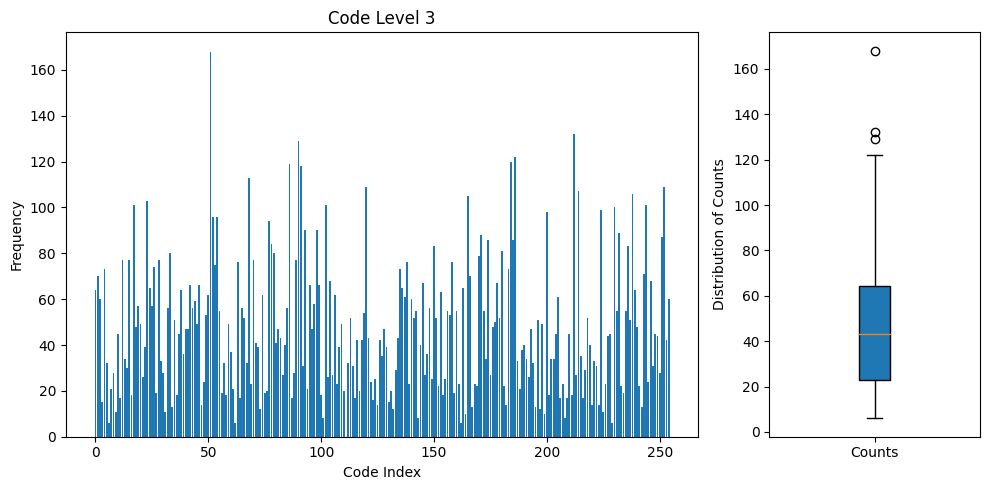

In [6]:
codebook_size = len(np.unique(semantic_ids[:,2]))
counts, bins = np.histogram(semantic_ids[:,2], bins=range(codebook_size+1))

# Create the figure and the two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [3, 1]})

# Histogram on the first subplot
axs[0].bar(bins[:-1], counts, width=0.8, align='center')
axs[0].set_xlabel('Code Index')
axs[0].set_title('Code Level 3')
axs[0].set_ylabel('Frequency')

# Boxplot on the second subplot to visualize the distribution of count values
# Since we need the distribution of count values for each code index, we need to extract these counts
# Here, we'll assume the count values are the frequency counts of each unique value in semantic_ids[:,2]
unique, counts = np.unique(semantic_ids[:,2], return_counts=True)
axs[1].boxplot(counts, vert=True, patch_artist=True)
axs[1].set_xticks([1])
axs[1].set_xticklabels(['Counts'])
axs[1].set_ylabel('Distribution of Counts')

plt.tight_layout()
plt.show()



## Embedding Distribution

In [9]:
with open(f'ID_generation/preprocessing/processed/Beauty_embeddings.pkl', 'rb') as f:
    embeddings = pickle.load(f)

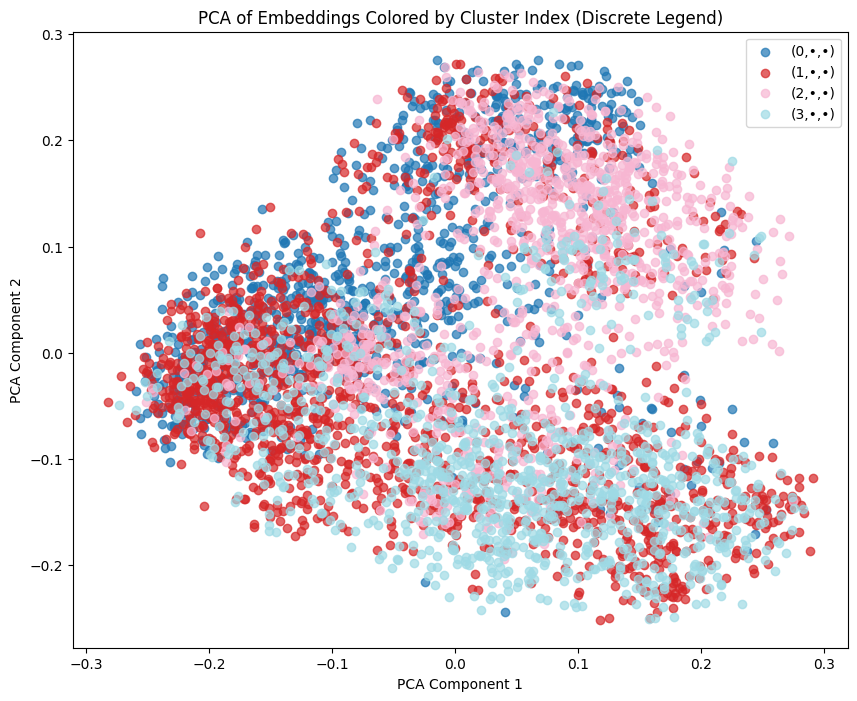

In [10]:
embeddings_array = embeddings
# Plot out the projected embedding distrbution for the first codebook level
cluster_indices_array = semantic_ids[:,0]

# Sample 5000 indices to plot
indices = np.random.choice(range(embeddings_array.shape[0]), size=5000, replace=False)
# indices = np.arange(embeddings_array.shape[0]) 

sampled_embeddings = embeddings_array[indices]
sampled_cluster_indices = cluster_indices_array[indices]
unique_clusters = np.unique(sampled_cluster_indices)
num_unique_clusters = len(unique_clusters)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(sampled_embeddings)


colors = plt.cm.tab20(np.linspace(0, 1, num_unique_clusters))
plt.figure(figsize=(10, 8))
for i, cluster in enumerate(unique_clusters):
    cluster_indices = sampled_cluster_indices == cluster
    plt.scatter(
        pca_result[cluster_indices, 0], 
        pca_result[cluster_indices, 1], 
        color=colors[i],
        alpha=0.7, 
        label=f'({cluster},•,•)'
    )

plt.title('PCA of Embeddings Colored by Cluster Index (Discrete Legend)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()


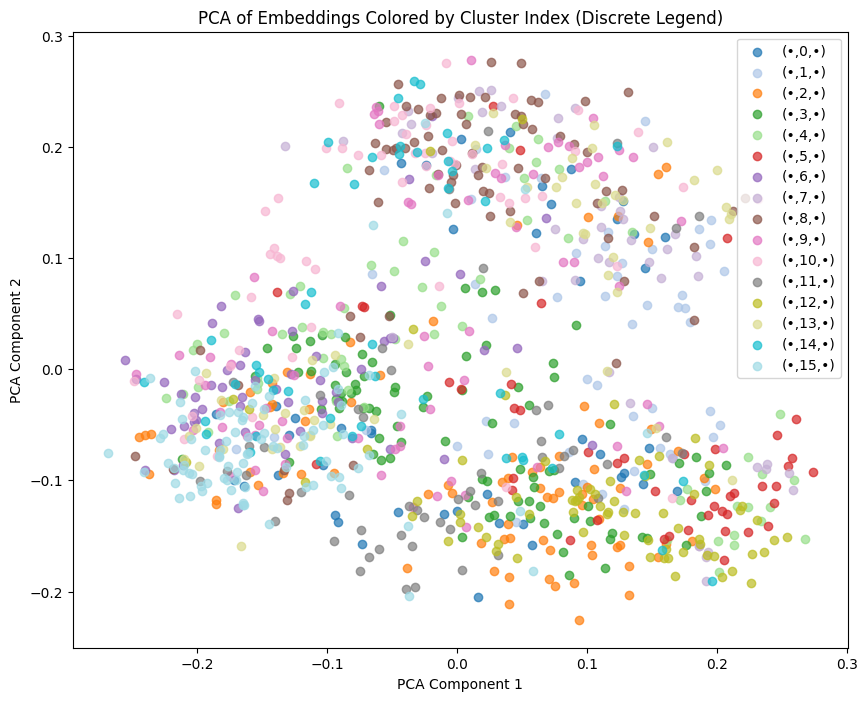

In [11]:
embeddings_array = embeddings
# Plot out the projected embedding distrbution for the second codebook level
cluster_indices_array = semantic_ids[:,1]

# Sample 1000 indices to plot
indices = np.random.choice(range(embeddings_array.shape[0]), size=1000, replace=False)
# indices = np.arange(embeddings_array.shape[0]) 

sampled_embeddings = embeddings_array[indices]
sampled_cluster_indices = cluster_indices_array[indices]
unique_clusters = np.unique(sampled_cluster_indices)
num_unique_clusters = len(unique_clusters)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(sampled_embeddings)


colors = plt.cm.tab20(np.linspace(0, 1, num_unique_clusters))
plt.figure(figsize=(10, 8))
for i, cluster in enumerate(unique_clusters):
    cluster_indices = sampled_cluster_indices == cluster
    plt.scatter(
        pca_result[cluster_indices, 0], 
        pca_result[cluster_indices, 1], 
        color=colors[i],
        alpha=0.7, 
        label=f'(•,{cluster},•)'
    )

plt.title('PCA of Embeddings Colored by Cluster Index (Discrete Legend)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.show()


In [13]:
# Load in attribute infos
with open('ID_generation/preprocessing/processed/Beauty_attributesmap.json', 'r') as file:
    attributesmap = json.load(file)

with open('ID_generation/preprocessing/processed/Beauty_item2attributes.json', 'r') as file:
    item2attributes = json.load(file)

In [14]:
attributesmap.keys()

dict_keys(['user2id', 'item2id', 'id2user', 'id2item', 'attribute2id', 'id2attribute', 'attributeid2num'])

In [15]:
embeddings_array = embeddings
cluster_indices_array = semantic_ids[:,0]

indices = np.where(np.isin(semantic_ids[:,0],np.arange(5)))[0]

# count = defaultdict(int)
# for i in indices:
#     att_list = item2attributes[str(i+1)]
# #     print(att_list)
#     for a in att_list:
#         count[a] += 1

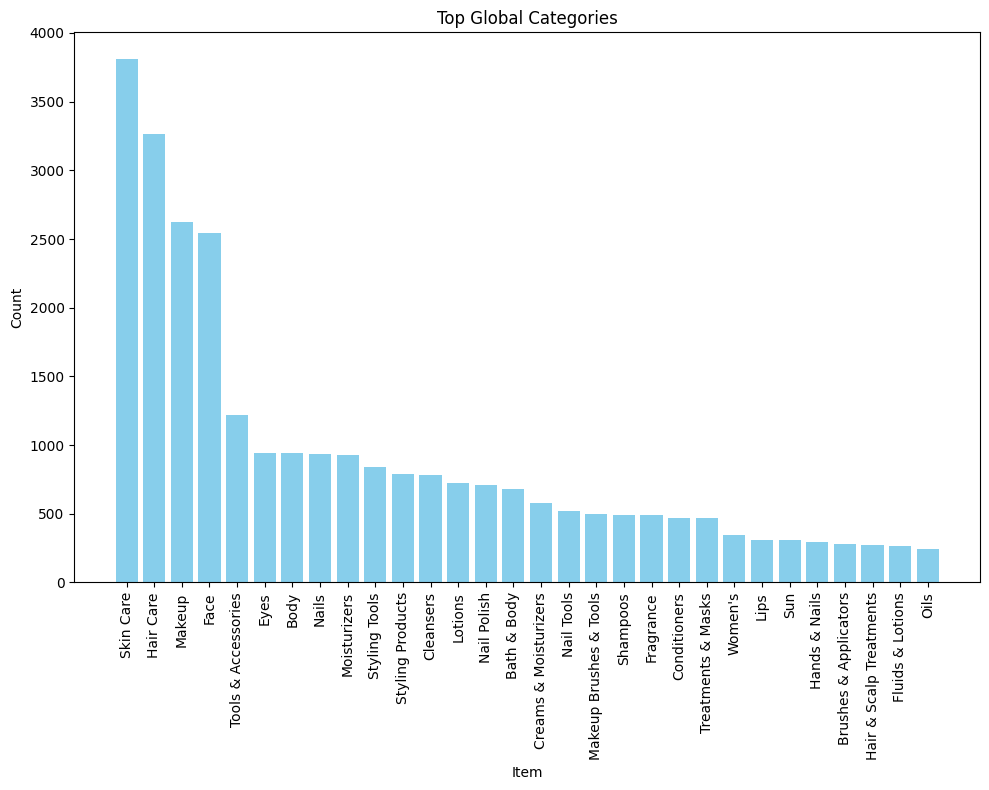

In [16]:
top = sorted(attributesmap['attributeid2num'].items(), key=lambda x: x[1], reverse=True)[:30]
top_count = dict(top)

# Converting to the desired format for plotting
item_labels = [attributesmap['id2attribute'][str(k)] for k in top_count.keys()]
counts = list(top_count.values())

# Plotting as a vertical bar plot
plt.figure(figsize=(10, 8))
plt.bar(item_labels, counts, color='skyblue')
plt.xlabel('Item')
plt.ylabel('Count')
plt.title('Top Global Categories')
plt.xticks(rotation=90)  # Rotate x-axis labels to prevent overlap

plt.tight_layout()  # Adjust layout to accommodate rotated labels
plt.show()


## Category Distribution at Code Level 1

In [17]:
ids = np.unique(semantic_ids[:,0])
# Initialize num_attribute x num_code to keep track of the number of occurrence of each attributes for each code.
# The (i,j)th entry is the occurance of the ith attribute represented by the jth code
count = np.zeros(shape=(len(attributesmap['attributeid2num']), len(ids)), dtype=int)
for i in ids:
    item_ids = np.where(semantic_ids[:,0] == i)[0]
    for item_id in item_ids:
        atts = item2attributes[str(item_id+1)]
        for a in atts:
            count[a-1, i] += 1

In [18]:
# Check that each row indeed sum up to the number of each attributes
# for i in range(count.shape[0]):
#     assert np.sum(count[i,:]) == attributesmap['attributeid2num'][str(i+1)]

In [19]:
count.shape

(246, 4)

In [20]:
# top = sorted(attributesmap['attributeid2num'].items(), key=lambda x: x[1], reverse=True)[:30]
# top_atts = np.array(top)[:,0]

top_atts = (np.argsort(np.sum(count, axis=1))[::-1][:30] + 1).astype(str)
# top_atts = (np.argsort(np.sum(count, axis=1))[::-1][5:30] + 1).astype(str)
print(top_atts)
top_att_count = count[top_atts.astype(int)-1]
top_att_count_normalized = top_att_count / np.sum(top_att_count)
top_att_name = np.array([attributesmap['id2attribute'][a] for a in top_atts])

# Sort the counts by probablities of code index 3 (to make the graph nicer)
att_order = np.argsort(top_att_count_normalized[:,0])

['15' '4' '1' '2' '46' '21' '24' '111' '25' '18' '5' '27' '29' '114' '12'
 '32' '100' '55' '28' '7' '11' '31' '8' '53' '65' '16' '123' '30' '33'
 '26']


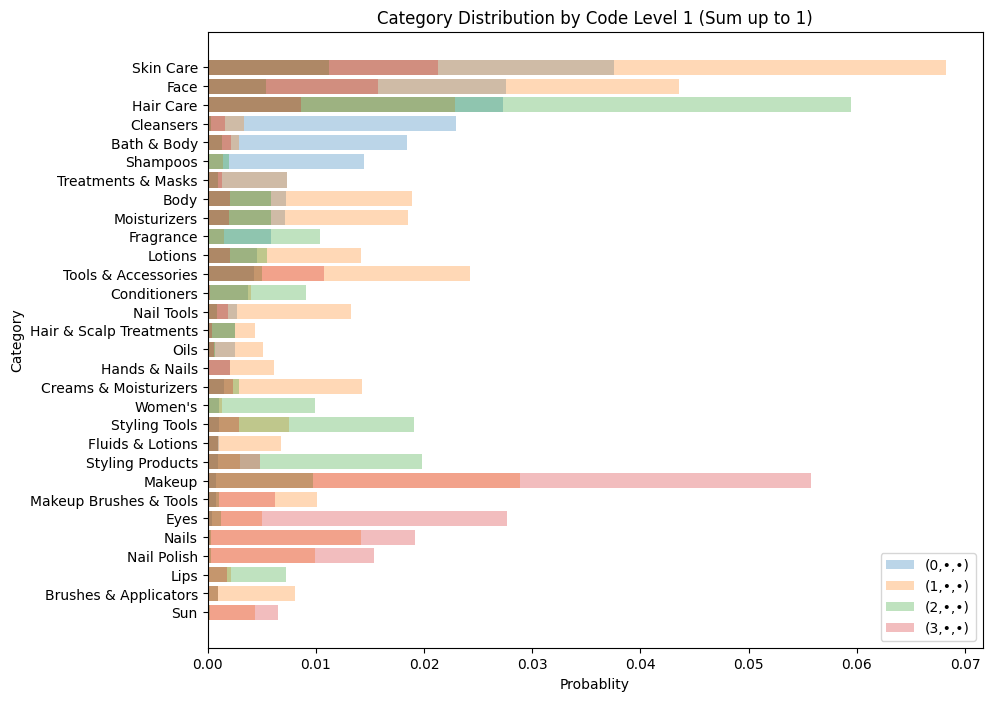

In [21]:
import numpy as np
import matplotlib.pyplot as plt

num_attributes = len(top_att_name)
num_codes = top_att_count_normalized.shape[1]

plt.figure(figsize=(10, 8))
for code_index in range(num_codes):
    plt.barh(top_att_name[att_order], top_att_count_normalized[att_order][:, code_index], alpha=0.3, label=f'({code_index},•,•)')

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Distribution by Code Level 1 (Sum up to 1)')
plt.legend()

plt.show()



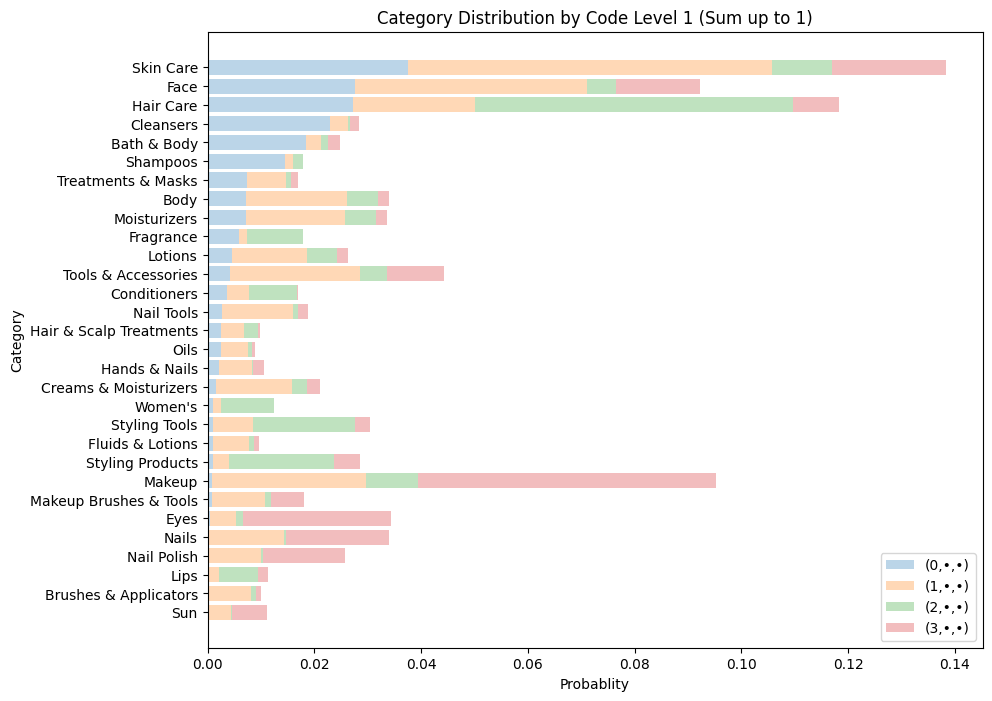

In [22]:
plt.figure(figsize=(10, 8))

bottoms = np.zeros(len(top_att_name))
for code_index in range(top_att_count_normalized.shape[1]):
    plt.barh(top_att_name[att_order], top_att_count_normalized[att_order][:, code_index], left=bottoms, alpha=0.3, label=f'({code_index},•,•)')
    bottoms += top_att_count_normalized[att_order][:, code_index]

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Distribution by Code Level 1 (Sum up to 1)')
plt.legend()

plt.show()

In [23]:
top_att_count_normalized_by_code = top_att_count / top_att_count.sum(axis=0)

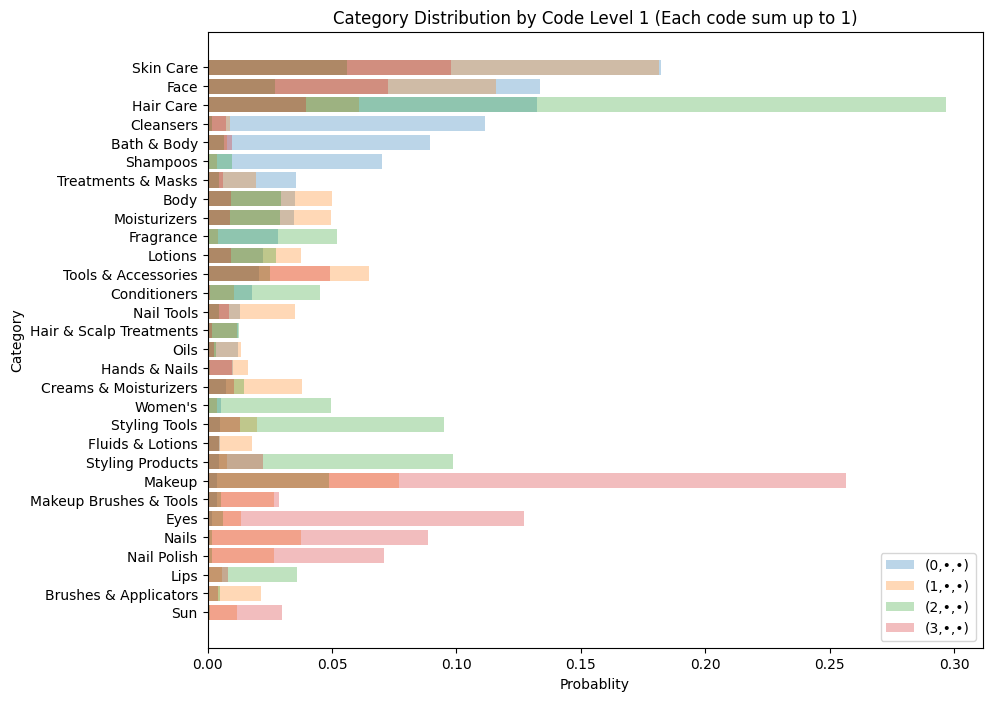

In [24]:
import numpy as np
import matplotlib.pyplot as plt

num_attributes = len(top_att_name)
num_codes = top_att_count_normalized_by_code.shape[1]

plt.figure(figsize=(10, 8))
for code_index in range(num_codes):
    plt.barh(top_att_name[att_order], top_att_count_normalized_by_code[att_order][:, code_index], alpha=0.3, label=f'({code_index},•,•)')

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Distribution by Code Level 1 (Each code sum up to 1)')
plt.legend()

plt.show()

In [25]:
top_att_count_normalized_by_att = top_att_count / top_att_count.sum(axis=1).reshape(-1,1)

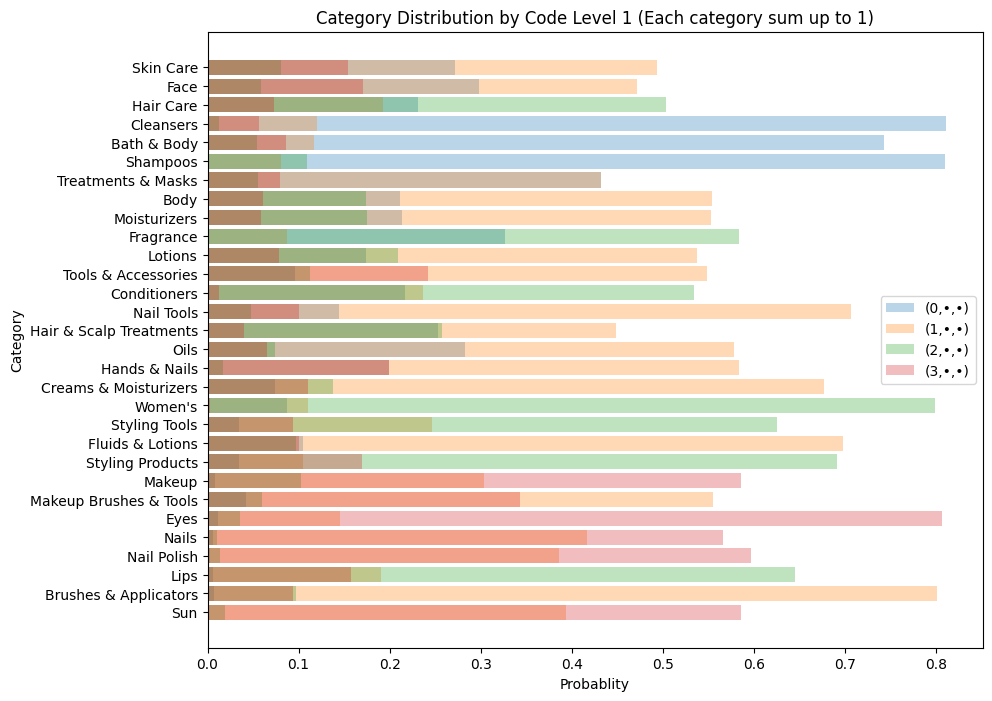

In [26]:
import numpy as np
import matplotlib.pyplot as plt

num_attributes = len(top_att_name)
num_codes = top_att_count_normalized_by_att.shape[1]

plt.figure(figsize=(10, 8))
for code_index in range(num_codes):
    plt.barh(top_att_name[att_order], top_att_count_normalized_by_att[att_order][:, code_index], alpha=0.3, label=f'({code_index},•,•)')

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Distribution by Code Level 1 (Each category sum up to 1)')
plt.legend()

plt.show()

### Some insights: 
* (0,•,•): Cleaning & Body Washing
* (1,•,•): Skin Care & Hand and Nail Care (e.g. Moisturizers, Lotions, Oils, Creams, Sun ...)
* (2,•,•): Hair Care & Women's Styling (Hair Style, Contioners, Brushes, ...)
* (3,•,•): Makeups (e.g Nail Polish, Makeup tools, Eyes, ...)

## Category Distribution at Code Level 2

[14  1  3 26 11 27 30 23 24 76]
[1037  760  753  634  508  400  202  199  198  181]


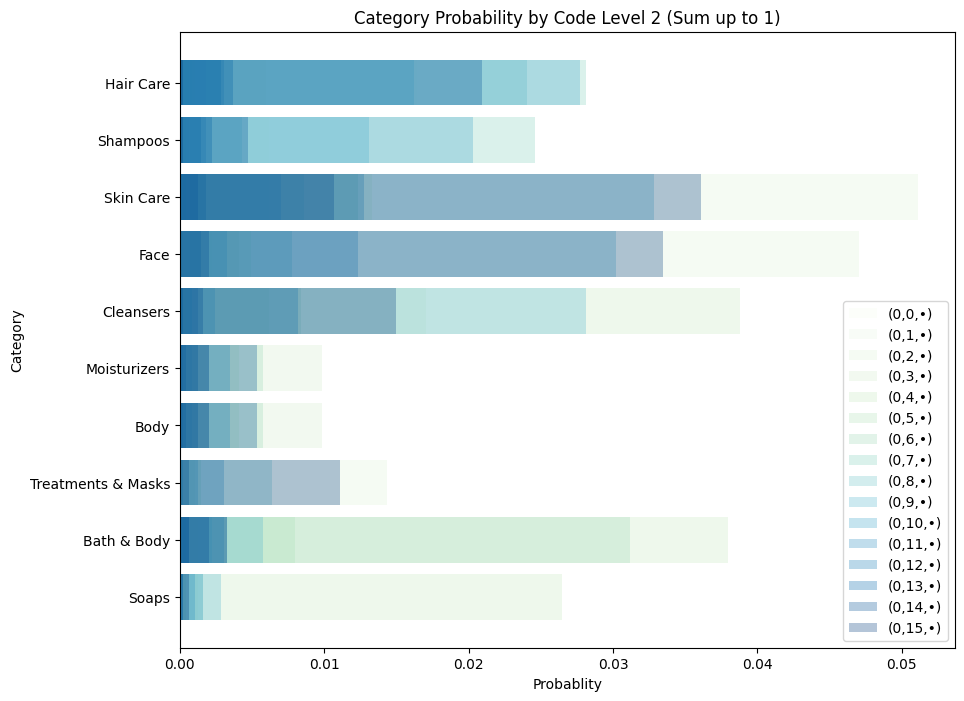

In [22]:
ids = np.unique(semantic_ids[:,1])
# Initialize num_attribute x num_code to keep track of the number of occurrence of each attributes for each code.
# The (i,j)th entry is the occurance of the ith attribute represented by the jth code
count = np.zeros(shape=(len(attributesmap['attributeid2num']), len(ids)), dtype=int)
for i in ids:
    item_ids = np.where((semantic_ids[:,0] == 0) & (semantic_ids[:,1] == i))[0]
    for item_id in item_ids:
        atts = item2attributes[str(item_id+1)]
        for a in atts:
            count[a-1, i] += 1
            

top_att_indicies = np.argsort(np.sum(count, axis=1))[::-1][:10]
top_atts = (top_att_indicies + 1).astype(str)

print(top_att_indicies)
print(np.sum(count, axis=1)[top_att_indicies])
top_att_count = count[top_atts.astype(int)-1]
top_att_count_normalized = top_att_count / np.sum(top_att_count)
top_att_name = np.array([attributesmap['id2attribute'][a] for a in top_atts])

# Sort the counts by probablities of code index 0 (to make the graph nicer)
att_order = np.argsort(top_att_count_normalized[:,0])

num_attributes = len(top_att_name)
num_codes = top_att_count_normalized.shape[1]

plt.figure(figsize=(10, 8))
cmap = plt.cm.GnBu

# Generate a range of colors from the colormap
colors = cmap(np.linspace(0, 1, num=len(ids)))

for code_index in range(num_codes):
    plt.barh(top_att_name[att_order], top_att_count_normalized[att_order][:, code_index], color=colors[code_index], alpha=0.3, label=f'(0,{code_index},•)')

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Probability by Code Level 2 (Sum up to 1)')
plt.legend()

plt.show()


[ 14   1   0  45   3  23  24  31  28 110]
[1881 1202  797  670  630  520  512  393  390  390]


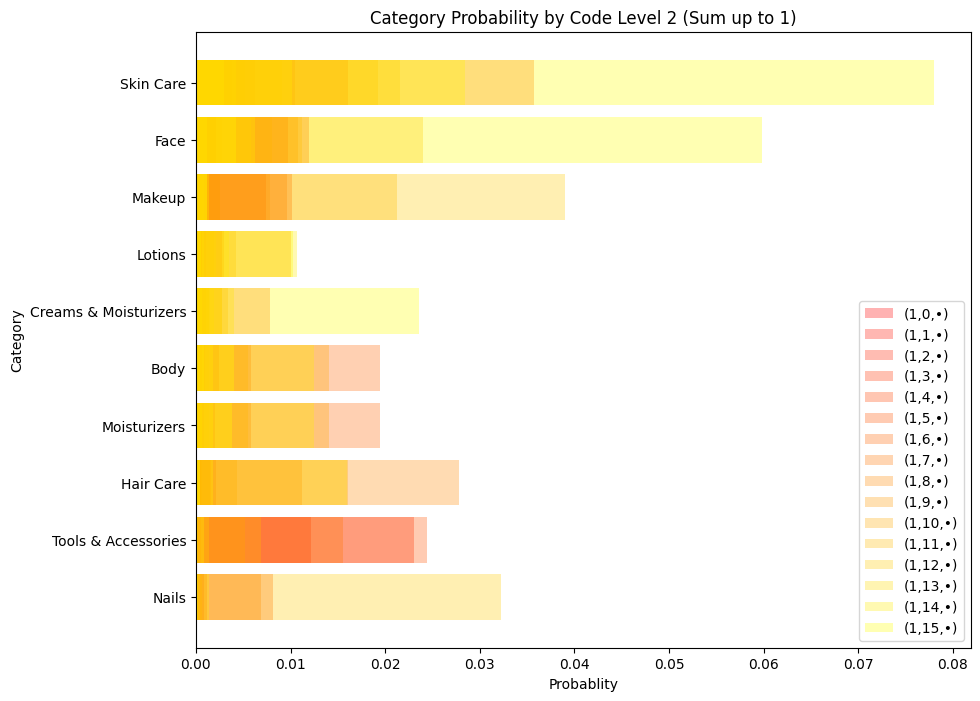

In [23]:
ids = np.unique(semantic_ids[:,1])
# Initialize num_attribute x num_code to keep track of the number of occurrence of each attributes for each code.
# The (i,j)th entry is the occurance of the ith attribute represented by the jth code
count = np.zeros(shape=(len(attributesmap['attributeid2num']), len(ids)), dtype=int)
for i in ids:
    item_ids = np.where((semantic_ids[:,0] == 1) & (semantic_ids[:,1] == i))[0]
    for item_id in item_ids:
        atts = item2attributes[str(item_id+1)]
        for a in atts:
            count[a-1, i] += 1

# top = sorted(attributesmap['attributeid2num'].items(), key=lambda x: x[1], reverse=True)[:30]
# top_atts = np.array(top)[:,0]

top_att_indicies = np.argsort(np.sum(count, axis=1))[::-1][:10]
top_atts = (top_att_indicies + 1).astype(str)
# top_atts = (np.argsort(np.sum(count, axis=1))[::-1][5:30] + 1).astype(str)
print(top_att_indicies)
print(np.sum(count, axis=1)[top_att_indicies])
top_att_count = count[top_atts.astype(int)-1]
top_att_count_normalized = top_att_count / np.sum(top_att_count)
top_att_name = np.array([attributesmap['id2attribute'][a] for a in top_atts])

# Sort the counts by probablities of code index 3 (to make the graph nicer)
att_order = np.argsort(top_att_count_normalized[:,0])

num_attributes = len(top_att_name)
num_codes = top_att_count_normalized.shape[1]

plt.figure(figsize=(10, 8))
cmap = plt.cm.autumn

# Generate a range of colors from the colormap
colors = cmap(np.linspace(0, 1, num=len(ids)))

for code_index in range(num_codes):
    plt.barh(top_att_name[att_order], top_att_count_normalized[att_order][:, code_index], color=colors[code_index], alpha=0.3, label=f'(1,{code_index},•)')

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Probability by Code Level 2 (Sum up to 1)')
plt.legend()
plt.show()

[ 3  4 17 14  6  7  0 10 52  5]
[1641  546  525  309  287  274  270  251  200  177]


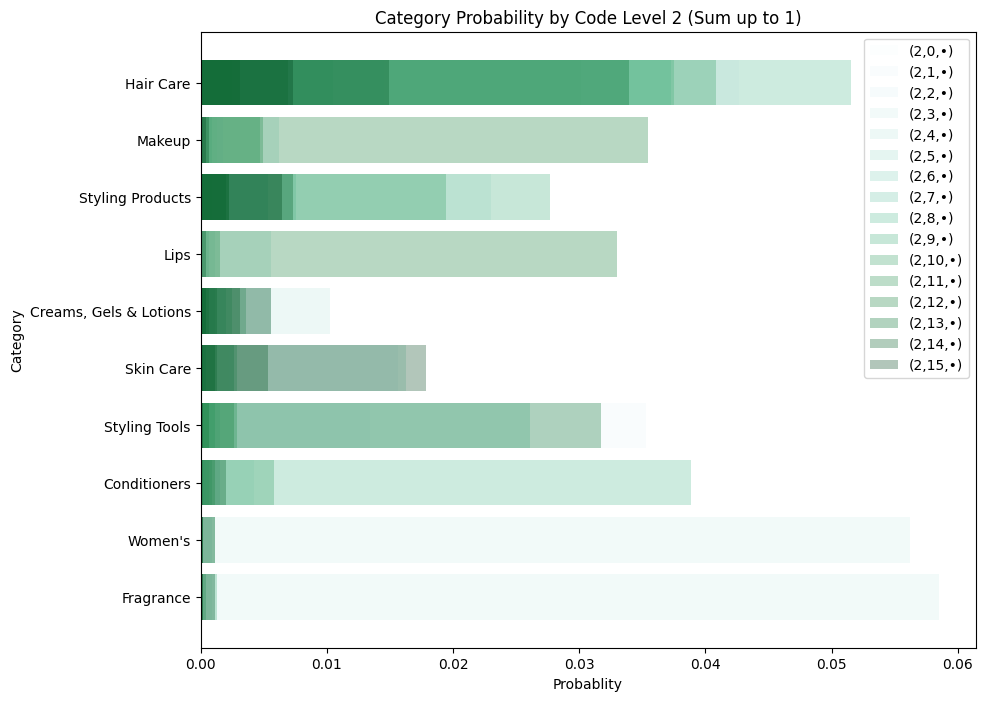

In [24]:
ids = np.unique(semantic_ids[:,1])
# Initialize num_attribute x num_code to keep track of the number of occurrence of each attributes for each code.
# The (i,j)th entry is the occurance of the ith attribute represented by the jth code
count = np.zeros(shape=(len(attributesmap['attributeid2num']), len(ids)), dtype=int)
for i in ids:
    item_ids = np.where((semantic_ids[:,0] == 2) & (semantic_ids[:,1] == i))[0]
    for item_id in item_ids:
        atts = item2attributes[str(item_id+1)]
        for a in atts:
            count[a-1, i] += 1

top_att_indicies = np.argsort(np.sum(count, axis=1))[::-1][:10]
top_atts = (top_att_indicies + 1).astype(str)
print(top_att_indicies)
print(np.sum(count, axis=1)[top_att_indicies])
top_att_count = count[top_atts.astype(int)-1]
top_att_count_normalized = top_att_count / np.sum(top_att_count)
top_att_name = np.array([attributesmap['id2attribute'][a] for a in top_atts])

# Sort the counts by probablities of code index 0 (to make the graph nicer)
att_order = np.argsort(top_att_count_normalized[:,0])

num_attributes = len(top_att_name)
num_codes = top_att_count_normalized.shape[1]

plt.figure(figsize=(10, 8))
cmap = plt.cm.BuGn

# Generate a range of colors from the colormap
colors = cmap(np.linspace(0, 1, num=len(ids)))

for code_index in range(num_codes):
    plt.barh(top_att_name[att_order], top_att_count_normalized[att_order][:, code_index], color=colors[code_index], alpha=0.3, label=f'(2,{code_index},•)')

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Probability by Code Level 2 (Sum up to 1)')
plt.legend()
plt.show()

[  0  20  14 110   1 113  45   3  21  64]
[1538  763  587  530  435  425  296  238  231  180]


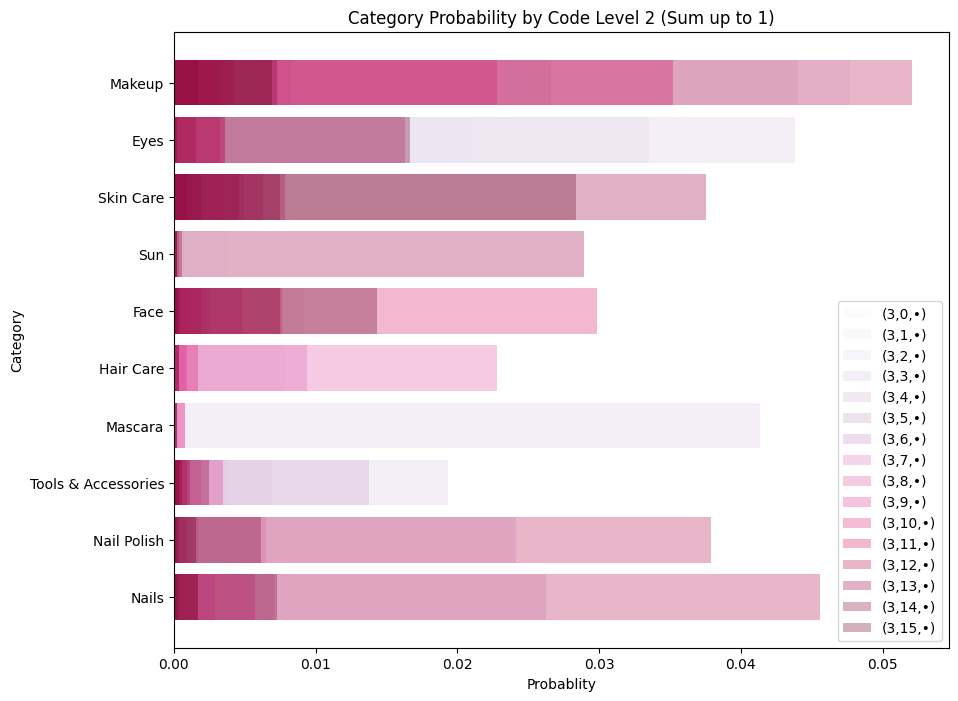

In [25]:
ids = np.unique(semantic_ids[:,1])
# Initialize num_attribute x num_code to keep track of the number of occurrence of each attributes for each code.
# The (i,j)th entry is the occurance of the ith attribute represented by the jth code
count = np.zeros(shape=(len(attributesmap['attributeid2num']), len(ids)), dtype=int)
for i in ids:
    item_ids = np.where((semantic_ids[:,0] == 3) & (semantic_ids[:,1] == i))[0]
    for item_id in item_ids:
        atts = item2attributes[str(item_id+1)]
        for a in atts:
            count[a-1, i] += 1


top_att_indicies = np.argsort(np.sum(count, axis=1))[::-1][:10]
top_atts = (top_att_indicies + 1).astype(str)
print(top_att_indicies)
print(np.sum(count, axis=1)[top_att_indicies])
top_att_count = count[top_atts.astype(int)-1]
top_att_count_normalized = top_att_count / np.sum(top_att_count)
top_att_name = np.array([attributesmap['id2attribute'][a] for a in top_atts])

# Sort the counts by probablities of code index 0 (to make the graph nicer)
att_order = np.argsort(top_att_count_normalized[:,0])

num_attributes = len(top_att_name)
num_codes = top_att_count_normalized.shape[1]

plt.figure(figsize=(10, 8))
cmap = plt.cm.PuRd

# Generate a range of colors from the colormap
colors = cmap(np.linspace(0, 1, num=len(ids)))

for code_index in range(num_codes):
    plt.barh(top_att_name[att_order], top_att_count_normalized[att_order][:, code_index], color=colors[code_index], alpha=0.3, label=f'(3,{code_index},•)')

plt.ylabel('Category')
plt.xlabel('Probablity')
plt.title('Category Probability by Code Level 2 (Sum up to 1)')
plt.legend()
plt.show()